<a href="https://colab.research.google.com/github/Pgao4/Machine_learning_demo/blob/main/ECE710_project3_group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=5>ECE 710 - Project 3</font></center>
<center><b>Group Member: Pengfei Gao & Shuo Wang</b></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Downsampling

In [ ]:
# load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for Project 3.csv')

In [ ]:
df.info()        # datatype
df.describe()    # mean, std

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285421 entries, 0 to 1285420
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Empatica_ACCX  1221855 non-null  float64
 1   Empatica_ACCY  1221855 non-null  float64
 2   Empatica_ACCZ  1221855 non-null  float64
 3   Empatica_HR    305154 non-null   float64
 4   Hexoskin_HR    290924 non-null   float64
 5   Hexoskin_RR    290924 non-null   float64
 6   Hexoskin_ACCX  1163758 non-null  float64
 7   Hexoskin_ACCY  1163758 non-null  float64
 8   Hexoskin_ACCZ  1163758 non-null  float64
 9   Activity       1285386 non-null  object 
dtypes: float64(9), object(1)
memory usage: 98.1+ MB


,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ
count,1.221855e+06,1.221855e+06,1.221855e+06,305154.000000,290924.000000,290924.000000,1.163758e+06,1.163758e+06,1.163758e+06
mean,1.475432e-01,-6.483944e-03,3.299203e-01,75.057116,76.437317,16.013223,3.249933e-02,-5.076208e-01,-4.558605e-02
std,6.489086e-01,4.466842e-01,4.942834e-01,15.830873,19.680226,4.393594,5.294778e-01,5.015478e-01,4.599337e-01
min,-1.950000e+00,-1.750000e+00,-1.700000e+00,47.030000,30.000000,3.000000,-2.000000e+00,-2.530000e+00,-1.280000e+00
25%,-4.200000e-01,-3.300000e-01,3.000000e-02,61.020000,60.000000,13.000000,-2.900000e-01,-9.400000e-01,-3.600000e-01
50%,2.500000e-01,-1.000000e-02,4.500000e-01,75.820000,75.000000,15.000000,1.000000e-02,-7.100000e-01,-1.100000e-01
75%,7.500000e-01,3.200000e-01,7.300000e-01,84.220000,87.000000,19.000000,4.000000e-01,-1.500000e-01,2.100000e-01
max,1.900000e+00,1.920000e+00,1.790000e+00,174.770000,187.000000,64.000000,2.000000e+00,1.020000e+00,1.420000e+00


In [ ]:
df.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,NaN,NaN,NaN,NaN,NaN,NaN,0.31,-0.09,-0.71,Out
1,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.02,-0.88,Out
2,NaN,NaN,NaN,NaN,NaN,NaN,0.78,-0.34,0.09,Out
3,NaN,NaN,NaN,NaN,NaN,NaN,1.01,-0.82,0.17,Out
4,NaN,NaN,NaN,NaN,70.0,10.0,0.83,-0.47,0.33,Out


In [ ]:
df['Activity'].isnull().value_counts()

False    1285386
True          35
Name: Activity, dtype: int64

In [ ]:
df.dropna(subset=['Activity'],inplace=True)

In [ ]:
df['Activity'].isnull().value_counts()

False    1285386
Name: Activity, dtype: int64

In [ ]:
pd.value_counts(df['Activity'])

Home     527297
Sleep    469407
Out      288682
Name: Activity, dtype: int64

In [ ]:
df['Activity'] = pd.factorize(df['Activity'])[0]

In [ ]:
pd.value_counts(df['Activity'])

1    527297
2    469407
0    288682
Name: Activity, dtype: int64

In [ ]:
#downsampling
idx = len(df) // 3600 * 3600
downsample_df = df[:idx].groupby(df.index[:idx] // 3600).mean()
#downsample_df.loc[:, 'Activity'] = df['Activity'].groupby(df.index[:idx] // 3600).mode()
downsample_df['Activity'] = downsample_df['Activity'].round().astype(int)
downsample_df.info()        # datatype
downsample_df.describe()    # mean, std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Empatica_ACCX  345 non-null    float64
 1   Empatica_ACCY  345 non-null    float64
 2   Empatica_ACCZ  345 non-null    float64
 3   Empatica_HR    345 non-null    float64
 4   Hexoskin_HR    327 non-null    float64
 5   Hexoskin_RR    327 non-null    float64
 6   Hexoskin_ACCX  327 non-null    float64
 7   Hexoskin_ACCY  327 non-null    float64
 8   Hexoskin_ACCZ  327 non-null    float64
 9   Activity       358 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 30.8 KB


,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
count,345.000000,345.000000,345.000000,345.000000,327.000000,327.000000,327.000000,327.000000,327.000000,358.000000
mean,0.147630,-0.006250,0.327669,75.228340,76.755762,16.053227,0.031390,-0.508203,-0.044859,1.134078
std,0.561520,0.301123,0.324861,13.731936,17.979876,3.271730,0.465120,0.468547,0.393580,0.758822
min,-1.000139,-0.842639,-0.847553,50.039033,36.124444,7.261111,-1.008839,-1.012681,-0.882628,0.000000
25%,-0.395597,-0.222700,0.129419,61.096644,60.232778,13.463889,-0.244798,-0.924878,-0.276781,1.000000
50%,0.265092,-0.013136,0.352864,77.606044,76.173333,15.143333,-0.008900,-0.672150,-0.082664,1.000000
75%,0.660025,0.228528,0.558736,84.529733,87.449444,18.452778,0.339257,-0.153953,0.105551,2.000000
max,0.923383,0.813886,0.939997,120.624756,136.103333,28.497778,0.970769,0.813403,1.007478,2.000000


In [ ]:
downsample_df.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,0.795284,0.159251,-0.117983,96.270585,94.595106,21.598443,0.259794,-0.937000,-0.072819,0
1,0.915222,0.238342,-0.087453,84.465756,86.631111,20.985556,0.385361,-0.908225,-0.139608,0
2,0.613869,-0.500831,0.190033,101.095544,108.477778,21.255556,0.079933,-0.956011,-0.089336,0
3,0.550951,-0.098380,-0.342870,101.441057,118.619844,18.054627,-0.103989,-0.989064,-0.053262,0
4,0.387303,-0.842639,-0.049214,108.357011,119.595556,19.536667,-0.232897,-0.978850,-0.110114,0


In [ ]:
pd.value_counts(downsample_df['Activity'])

1    146
2    130
0     82
Name: Activity, dtype: int64

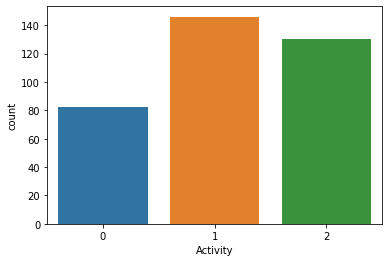

In [ ]:
import seaborn as sns
sns.countplot(x='Activity', data=downsample_df)

# Peprocess

## Highly Correlated Features

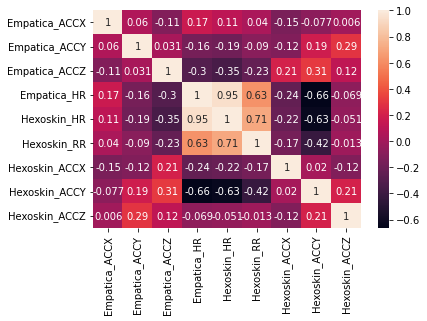

In [ ]:
#Visual
correlation_matrix = downsample_df.iloc[:, 0:9].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            sum_i = 0
            sum_j = 0
            for k in range(len(correlation_matrix.columns)):
                sum_i += abs(correlation_matrix.iloc[i, k])
                sum_j += abs(correlation_matrix.iloc[j, k])
            if sum_i > sum_j:  
              correlated_features.add(correlation_matrix.columns[i])
            else:  
              correlated_features.add(correlation_matrix.columns[j])

In [ ]:
print(correlated_features)

{'Hexoskin_HR'}


In [ ]:
#delete highly correlated features
downsample_df.drop(labels=correlated_features, axis=1, inplace=True)
downsample_df.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
0,0.795284,0.159251,-0.117983,96.270585,21.598443,0.259794,-0.937000,-0.072819,0
1,0.915222,0.238342,-0.087453,84.465756,20.985556,0.385361,-0.908225,-0.139608,0
2,0.613869,-0.500831,0.190033,101.095544,21.255556,0.079933,-0.956011,-0.089336,0
3,0.550951,-0.098380,-0.342870,101.441057,18.054627,-0.103989,-0.989064,-0.053262,0
4,0.387303,-0.842639,-0.049214,108.357011,19.536667,-0.232897,-0.978850,-0.110114,0


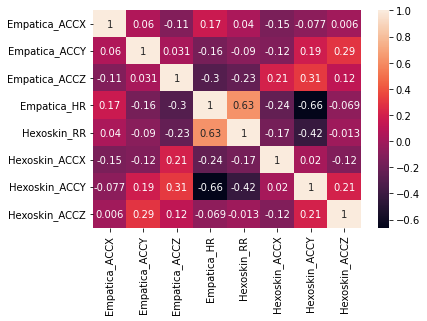

In [ ]:
#check correlations
correlation_matrix = downsample_df.iloc[:, 0:8].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Outlier Removal

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


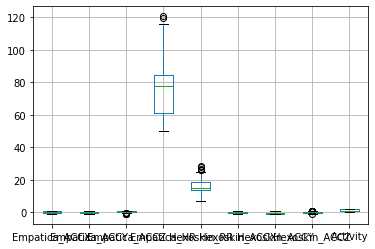

In [ ]:
downsample_df.boxplot()

In [ ]:
for i in downsample_df:
  if i == 'Activity':
    continue
  Q1 = downsample_df[i].quantile(0.25)
  Q3 = downsample_df[i].quantile(0.75)
  IQR = Q3 - Q1 
  max = Q3+(1.5*IQR)
  min = Q1-(1.5*IQR)
  for j in downsample_df.index:
    if downsample_df.loc[j,i] < min:
      downsample_df.loc[j,i] = np.nan
    if downsample_df.loc[j,i] > max:
      downsample_df.loc[j,i] = np.nan

In [ ]:
downsample_df.isnull().sum()

Empatica_ACCX    13
Empatica_ACCY    13
Empatica_ACCZ    20
Empatica_HR      15
Hexoskin_RR      36
Hexoskin_ACCX    31
Hexoskin_ACCY    31
Hexoskin_ACCZ    53
Activity          0
dtype: int64

## Missing data

In [ ]:
#delete NA value
downsample_df.dropna(axis=0, how='any', inplace=True)

In [ ]:
downsample_df.isnull().sum()

Empatica_ACCX    0
Empatica_ACCY    0
Empatica_ACCZ    0
Empatica_HR      0
Hexoskin_RR      0
Hexoskin_ACCX    0
Hexoskin_ACCY    0
Hexoskin_ACCZ    0
Activity         0
dtype: int64

In [ ]:
downsample_df.info()        # datatype
downsample_df.describe()    # mean, std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 357
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Empatica_ACCX  282 non-null    float64
 1   Empatica_ACCY  282 non-null    float64
 2   Empatica_ACCZ  282 non-null    float64
 3   Empatica_HR    282 non-null    float64
 4   Hexoskin_RR    282 non-null    float64
 5   Hexoskin_ACCX  282 non-null    float64
 6   Hexoskin_ACCY  282 non-null    float64
 7   Hexoskin_ACCZ  282 non-null    float64
 8   Activity       282 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 22.0 KB


,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ,Activity
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,0.107930,-0.030799,0.334997,75.827229,16.050993,0.013593,-0.549568,-0.097545,1.187943
std,0.575326,0.298674,0.287437,13.357783,2.981284,0.477581,0.458889,0.322750,0.682884
min,-0.927153,-0.842639,-0.390811,50.270944,7.261111,-1.008839,-1.010647,-0.831575,0.000000
25%,-0.492124,-0.238963,0.136870,62.379592,13.586389,-0.267157,-0.928469,-0.281387,1.000000
50%,0.193989,-0.036942,0.325749,77.610206,15.715556,-0.008278,-0.805358,-0.091117,1.000000
75%,0.657863,0.183577,0.534010,85.024097,18.464722,0.309580,-0.192033,0.049817,2.000000
max,0.923383,0.813886,0.939997,115.697544,24.921875,0.970769,0.813403,0.665086,2.000000


In [ ]:
pd.value_counts(downsample_df['Activity'])

1    141
2     97
0     44
Name: Activity, dtype: int64

## Normalization

In [ ]:
#Another way
from sklearn.model_selection import train_test_split
y = downsample_df['Activity']
X = downsample_df.drop(columns=['Activity'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
X_train.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ
239,-0.019789,0.435036,0.675969,58.760400,13.345556,0.464581,-0.125553,0.662586
191,0.575367,0.105958,-0.240519,77.505789,12.907778,-0.072889,-0.878153,-0.307792
4,0.387303,-0.842639,-0.049214,108.357011,19.536667,-0.232897,-0.978850,-0.110114
259,0.587350,-0.363072,-0.131739,78.704467,17.235556,-0.029778,-0.846347,0.152894
222,-0.416131,-0.595486,0.500642,70.113889,15.316667,0.806267,-0.265808,-0.229328


In [ ]:
# use the .mean() and .std() methods to apply the z-score method in Pandas
# use the mean and std of train set to normalization validation set and test set
for column in X_test.columns:
  X_test[column] = (X_test[column] - X_train[column].mean()) / X_train[column].std()

In [ ]:
for column in X_train.columns:
  X_train[column] = (X_train[column] - X_train[column].mean()) / X_train[column].std()

In [ ]:
X_train.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ
239,-0.190643,1.600660,1.145383,-1.237738,-0.917180,0.922068,0.872049,2.348174
191,0.851281,0.483694,-2.100606,0.148740,-1.062478,-0.209455,-0.707959,-0.685474
4,0.522042,-2.736064,-1.423046,2.430609,1.137644,-0.546317,-0.919363,-0.067483
259,0.872260,-1.108304,-1.715330,0.237398,0.373908,-0.118694,-0.641187,0.754748
222,-0.884508,-1.897171,0.524413,-0.397992,-0.262970,1.641413,0.577597,-0.440176


In [ ]:
X_test.head()

,Empatica_ACCX,Empatica_ACCY,Empatica_ACCZ,Empatica_HR,Hexoskin_RR,Hexoskin_ACCX,Hexoskin_ACCY,Hexoskin_ACCZ
59,0.634372,2.221842,0.058799,0.147798,0.570834,-1.382545,-0.003646,-1.333582
204,0.740220,0.705460,-0.507451,0.695921,0.152273,-0.358257,-0.743772,0.328153
133,0.278762,1.340200,0.286977,0.050855,-0.527014,-0.550527,1.255306,1.907772
248,-0.403121,-0.029598,1.783245,-1.259449,-1.058421,1.376545,0.934180,1.246004
7,0.999490,0.986540,-1.525344,1.883993,0.171449,0.008547,-0.720375,0.129219


## Class Imbalance

In [ ]:
pd.value_counts(y_train)

1    113
2     77
0     35
Name: Activity, dtype: int64

In [ ]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
pd.value_counts(y_train_sm)

2    113
1    113
0    113
Name: Activity, dtype: int64

## One-hot encode

In [ ]:
#one-hot for train set
y_train_oh = pd.get_dummies(y_train)

In [ ]:
y_train_oh

,0,1,2
239,0,0,1
191,0,1,0
4,1,0,0
259,0,1,0
222,0,1,0
...,...,...,...
217,0,1,0
260,0,1,0
182,0,1,0
274,0,0,1


In [ ]:
#one-hot for test set
y_test_oh = pd.get_dummies(y_test)

# Logistic Regression

### Model with SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_sm, y_train_sm)
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.79      0.82      0.81        28
           2       1.00      0.75      0.86        20

    accuracy                           0.81        57
   macro avg       0.80      0.82      0.80        57
weighted avg       0.84      0.81      0.81        57



Accuracy Score: 0.8070175438596491


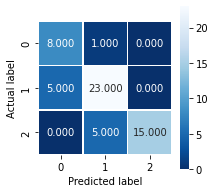

In [ ]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
score = lr.score(X_test, y_test)

print('Accuracy Score: {0}'.format(score))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### Model without SMOTE

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
predictions2 = lr2.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.74      0.93      0.83        28
           2       1.00      0.75      0.86        20

    accuracy                           0.81        57
   macro avg       0.82      0.74      0.77        57
weighted avg       0.83      0.81      0.80        57



Accuracy Score: 0.8070175438596491


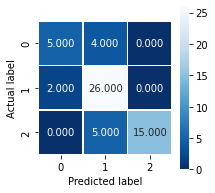

In [ ]:
#Confusion matrix
from sklearn import metrics
cm2 = metrics.confusion_matrix(y_test, predictions2)
score2 = lr2.score(X_test, y_test)

print('Accuracy Score: {0}'.format(score2))
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### Model with 'ovr' option

In [ ]:
#Use 'ovr'
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr.fit(X_train, y_train)
predictions_ovr = lr_ovr.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions_ovr))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.76      0.93      0.84        28
           2       1.00      0.80      0.89        20

    accuracy                           0.82        57
   macro avg       0.83      0.76      0.78        57
weighted avg       0.84      0.82      0.82        57



Accuracy Score: 0.8245614035087719


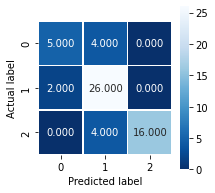

In [ ]:
#Confusion matrix
cm_ovr = metrics.confusion_matrix(y_test, predictions_ovr)
score_ovr = lr_ovr.score(X_test, y_test)

print('Accuracy Score: {0}'.format(score_ovr))
plt.figure(figsize=(3,3))
sns.heatmap(cm_ovr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Random Forest

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score

In [ ]:
# import the classifier
from sklearn.ensemble import RandomForestClassifier

# create classifier object
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
# use cross validation to calculate the score
score_pre = cross_val_score(rf, X_train, y_train, cv=10).mean()
score_pre

0.8397233201581027

### Adjust parameters

### Select the best n_estimators

Best parameter and highest score: [40.          0.85750988]


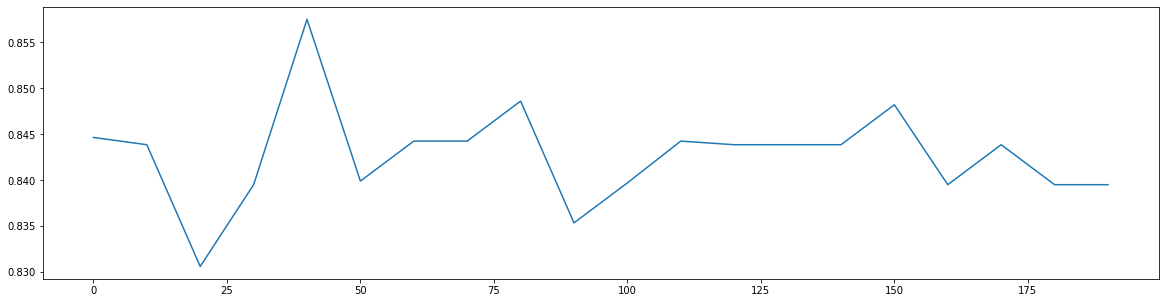

In [ ]:
ScoreAll = []
for i in range(0, 200, 10):
    clf = RandomForestClassifier(n_estimators = i+1, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0] 
print("Best parameter and highest score:", ScoreAll[max_score])
plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()

Best parameter and highest score: [34.          0.86185771]


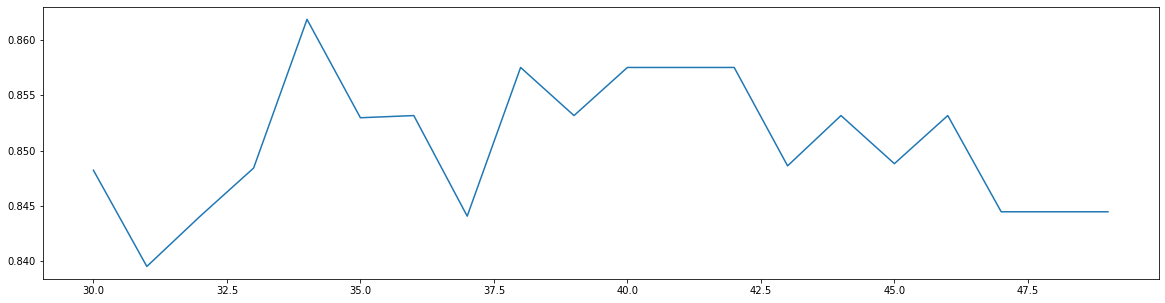

In [ ]:
ScoreAll = []
for i in range(30, 50):
    clf = RandomForestClassifier(n_estimators = i, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0] 
print("Best parameter and highest score:", ScoreAll[max_score])
plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()

### Select the best max_depth

In [ ]:
# bulid the random forest model that n_estimators = 34
rf = RandomForestClassifier(n_estimators=34, random_state=42)

# Adjust max_depth with grid search
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rf, param_grid, cv=10)
GS.fit(X_train, y_train)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 11} 0.8618577075098814


### Calculating  feature importance

In [ ]:
rf.fit(X_train, y_train)
feature_imp = pd.Series(rf.feature_importances_, index = X_test.columns).sort_values(ascending = False)
feature_imp

Empatica_HR      0.264759
Hexoskin_ACCY    0.232132
Hexoskin_RR      0.137589
Empatica_ACCZ    0.102208
Hexoskin_ACCZ    0.077742
Hexoskin_ACCX    0.073699
Empatica_ACCX    0.071003
Empatica_ACCY    0.040867
dtype: float64

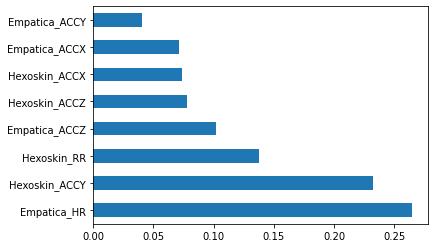

In [ ]:
feature_imp.plot.barh()
plt.show()

### Adjust max_features

In [ ]:
# Adjust max_depth with grid search
param_grid = {'max_features':np.arange(1,9)}

rf = RandomForestClassifier(n_estimators=34
                            ,random_state=42
                            ,max_depth=11)
GS = GridSearchCV(rf, param_grid, cv=10)
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_features': 2} 0.8618577075098814


### Use selected parameters to retrain the model

In [ ]:
# create classifier object
rf = RandomForestClassifier(n_estimators = 34, max_depth = 11, random_state = 42)

In [ ]:
# use cross validation to calculate the score
score_pre = cross_val_score(rf, X_train, y_train, cv=10).mean()
score_pre

0.8618577075098814

In [ ]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred = rf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8596491228070176


In [ ]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.81      0.93      0.87        28
           2       0.94      0.85      0.89        20

    accuracy                           0.86        57
   macro avg       0.87      0.82      0.84        57
weighted avg       0.87      0.86      0.86        57



Accuracy Score: 0.8596491228070176


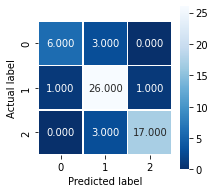

In [ ]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
score = rf.score(X_test, y_test)

print('Accuracy Score: {0}'.format(score))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [ ]:
# Hamming distance
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(y_test,y_pred)
ham_distance

0.14035087719298245

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_sm, y_train_sm)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
# print classification report
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.79      0.79      0.79        28
           2       1.00      0.75      0.86        20

    accuracy                           0.79        57
   macro avg       0.79      0.81      0.78        57
weighted avg       0.83      0.79      0.80        57



Accuracy Score: 0.7894736842105263


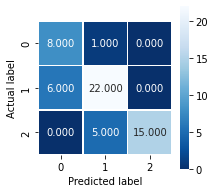

In [ ]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, svm_predictions)
score = svm_model_linear.score(X_test, y_test)

print('Accuracy Score: {0}'.format(score))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_sm, y_train_sm)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

In [ ]:
# print classification report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.83      0.71      0.77        28
           2       0.95      0.90      0.92        20

    accuracy                           0.79        57
   macro avg       0.76      0.80      0.77        57
weighted avg       0.82      0.79      0.80        57



Accuracy Score: 0.7894736842105263


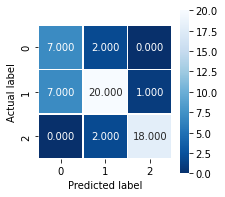

In [ ]:
#Confusion matrix
from sklearn import metrics
score = knn.score(X_test, y_test)

print('Accuracy Score: {0}'.format(score))
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');